In [1]:
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

from jax import grad, jit, vmap, pmap
from jax import lax
from jax import random
from jax import make_jaxpr
from jax import device_put # push NumPy explicitly to the GPU

### Jax with NumPy

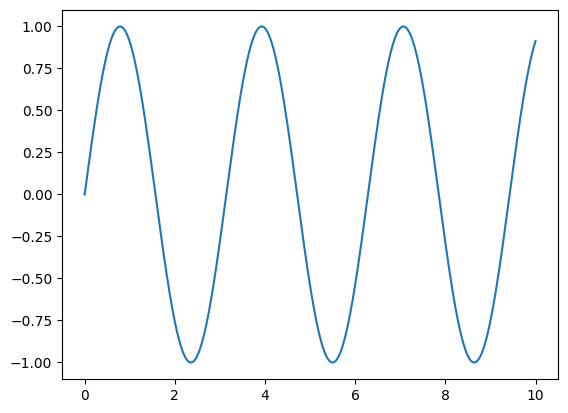

In [2]:
x_np = np.linspace(0, 10, 1000)
y_np = 2 * np.sin(x_np) * np.cos(x_np)
#plt.plot(x_np, y_np) would be the same as the jax version below

x_jnp = jnp.linspace(0, 10, 1000)
y_jnp = 2 * jnp.sin(x_jnp) * jnp.cos(x_jnp)
plt.plot(x_jnp, y_jnp)
plt.show()

In [3]:
size = 10
index = 0
value = 23

print("NumPy: mutable arrays")
x = np.arange(size)
print(f'x = {x}')
x[index] = value
print(f'x = {x}')

print("JAX: immutable arrays")
x = jnp.arange(size)
print(f'x = {x}')
#x[index] = value #Jax is immutable, so this is not callable
# Solution
y = x.at[index].set(value)
print(f'y = {y}')
print("we should make a new array instead of changing the old one")


NumPy: mutable arrays
x = [0 1 2 3 4 5 6 7 8 9]
x = [23  1  2  3  4  5  6  7  8  9]
JAX: immutable arrays
x = [0 1 2 3 4 5 6 7 8 9]
y = [23  1  2  3  4  5  6  7  8  9]
we should make a new array instead of changing the old one


In [4]:
seed = 0
key = random.PRNGKey(seed)

x = random.normal(key, (10,))
print(type(x), x)

y = random.normal(key, (10,))
print(type(y), y)

<class 'jaxlib.xla_extension.ArrayImpl'> [-0.3721109   0.26423115 -0.18252768 -0.7368197  -0.44030377 -0.1521442
 -0.67135346 -0.5908641   0.73168886  0.5673026 ]
<class 'jaxlib.xla_extension.ArrayImpl'> [-0.3721109   0.26423115 -0.18252768 -0.7368197  -0.44030377 -0.1521442
 -0.67135346 -0.5908641   0.73168886  0.5673026 ]


### JAX transformation functions